In [4]:
from keras.models import Sequential, load_model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

# 從 HDF5 檔案中載入模型
model = load_model("MnistCNN.h5")

#顯示模型
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [ ]:
import os
from PIL import Image
import numpy as np

def load_data():
    data = np.empty((1, 1, 28, 28), dtype="float32")
    label = np.empty((1,), dtype="uint8")

    imgs = os.listdir("d:/school/image")
    num = len(imgs)
    for i in range(num):
        img = Image.open("d:/school/image/"+imgs[i])
        arr = np.asarray(img, dtype="float32")
        data[i, :, :, :] = arr
        label[i] = int(imgs[i].split('.')[0])
    data = data.reshape(1, 28, 28, 1)
    return data, label

In [92]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

x_Test, y_Test = load_data()
#x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 3).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

#x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

#y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)


In [6]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

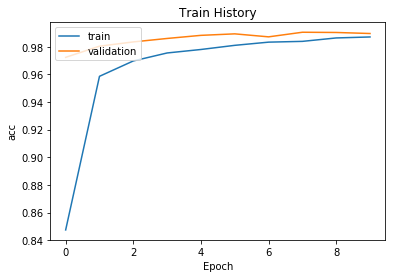

In [7]:
show_train_history(train_history,'acc','val_acc')

In [93]:
prediction=model.predict_classes(x_Test4D_normalize)

In [94]:
prediction[:10]

array([2], dtype=int64)

In [100]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,2
label,
2,1


In [18]:
score = model.evaluate(x_Test4D_normalize, y_TestOneHot)

10000/10000 [==============================] - 10s 1ms/step


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float64')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float64')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same',
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



print(model.summary())

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 48s - loss: 0.4890 - acc: 0.8474 - val_loss: 0.0963 - val_acc: 0.9723
Epoch 2/10
 - 45s - loss: 0.1404 - acc: 0.9586 - val_loss: 0.0632 - val_acc: 0.9804
Epoch 3/10
 - 55s - loss: 0.1022 - acc: 0.9697 - val_loss: 0.0519 - val_acc: 0.9835
Epoch 4/10
 - 60s - loss: 0.0833 - acc: 0.9755 - val_loss: 0.0461 - val_acc: 0.9860
Epoch 5/10
 - 66s - loss: 0.0714 - acc: 0.9780 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 6/10
 - 65s - loss: 0.0636 - acc: 0.9810 - val_loss: 0.0380 - val_acc: 0.9893
Epoch 7/10
 - 64s - loss: 0.0552 - acc: 0.9833 - val_loss: 0.0423 - val_acc: 0.9872
Epoch 8/10
 - 62s - loss: 0.0507 - acc: 0.9839 - val_loss: 0.0343 - val_acc: 0.9905
Epoch 9/10
 - 61s - loss: 0.0447 - acc: 0.9864 - val_loss: 0.0334 - val_acc: 0.9903
Epoch 10/10
 - 62s - loss: 0.0418 - acc: 0.9871 - val_loss: 0.0349 - val_acc: 0.9896


In [95]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label="+str(labels[idx])
        if len(prediction) > 0:
            title += ",prediction="+str(prediction[idx])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()